<a href="https://colab.research.google.com/github/mahsaghaderan99/MLP/blob/backpropagation/mlp123.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep MLP project

#Part1

##Import

In [1]:
import tensorflow as tf
from keras.utils.np_utils import to_categorical  
from os import path, getcwd, chdir
import numpy as np

##Layer

In [137]:
class Layer:
  def __init__(self,node_number,activation):
    
    self.node_num = node_number
    self.delta = np.empty(node_number)
    self.vj = np.empty(node_number)
    self.outj = np.empty(node_number)
    self.b = np.zeros((self.node_num, 1)) 
    self.activation = self._sigmoid if activation == 'sigmoid' else self._relu
    self.d_activation = self._d_sigmoid if activation == 'sigmoid' else self._d_relu

  def define_weights(self,input_shape):
    self.weights = np.random.uniform(low=0, high=1, size=(self.node_num,input_shape))

  def _sigmoid(self,x):
    return np.power(1+np.exp(-0.5*x),-1)
    
  def _d_sigmoid(self,x):
    return self._sigmoid(x)*(1-self._sigmoid(x))

  def _relu(self,x):
    return x*(x>0)

  def _d_relu(self,x):
    return 1.*(x>0)

  def _none(self,x):
    return x
   

##Model

In [218]:
class Model:
  def __init__(self,learning_rate,epochs):
    self.layers = np.empty(0,dtype=Layer)
    self.lr = learning_rate
    self.epochs = epochs

  def Dense(self,node_number,activation_function):
    self.layers = np.append(self.layers,Layer(node_number,activation_function))

  def Train(self,training,training_y):
    try:
      self.training = training.reshape(training.shape[0],training.shape[1]*training.shape[2])
    except:
      self.training = np.expand_dims(training,1)
    self.desiered_labels = training_y
    self._define_weights()
    errors = []
    epoch = 1
    while self.epochs>=epoch:
      err = 0
      for tr in range(0,self.training.shape[0]):
        yhat = self._forward_propagation(tr)
        err += self._update_weights(tr)
      print(epoch,'-------total error:',err)
      epoch +=1
      errors.append(err)
    return errors

  def _define_weights(self):
    self.layers[0].define_weights(self.training[0].shape[0])
    for i in range(1,self.layers.shape[0]):
      self.layers[i].define_weights(self.layers[i-1].node_num)

  def _forward_propagation(self,tr):
    yhat = self._layer_output(self.training[tr] ,0)
    for i in range(1,self.layers.shape[0]):
      yhat = self._layer_output(yhat ,i)
    # print( yhat)
    return yhat

  def _layer_output(self,x,i):
    yhat = np.dot(self.layers[i].weights,x)
    if i!= self.layers.shape[0]:
      yhat = self.layers[i].activation(yhat)
    self.layers[i].yj = yhat
    return yhat

  def _update_weights(self,tr):
    err = np.sum(np.power(self.desiered_labels[tr]-self.layers[-1].yj,2))/2
    fiprim = self.layers[-1].d_activation(self.layers[-1-1].yj)
    fiprim = np.expand_dims(fiprim,1).T
    self.layers[-1].delta  = (fiprim * (self.desiered_labels[tr]-self.layers[-1].yj))
    # print(self.desiered_labels[tr]-self.layers[-1-1].yj)
    for i in range(len(self.layers)-2,-1,-1):
      self._delta(i,tr)
    for i in range(len(self.layers)-1,-1,-1):
      yj =np.expand_dims(self.layers[i].yj,1)
      delta = self.layers[i].delta
      deltaw = self.lr * delta * yj
      # print(delta)
      self.layers[i].weights = self.layers[i].weights + deltaw
      return err

  def _delta(self,i,tr):
    if i == 0: 
      input = self.training[tr]
    else:
      input = self.layers[i-1].yj
    fiprim =  self.layers[i-1].d_activation(input)
    fiprim = np.expand_dims(fiprim,1)
    sum_delta_w = np.sum((self.layers[i+1].weights*self.layers[i+1].delta).T,1)
    self.layers[i].delta =  (fiprim * sum_delta_w).T
  
  def Predict(self,test_images):
    try:
      testings = test_images.reshape(test_images.shape[0],test_images.shape[1]*test_images.shape[2])
    except:
      testings = test_images
    predicts = []
    for t in range(0,testings.shape[0]):
      yhat = self._layer_output(testings[t] ,0)
      for i in range(1,self.layers.shape[0]):
        yhat = self._layer_output(yhat ,i)
      predicts.append(yhat[0][0])
    return np.array(predicts)

  def Evaluate(self,x,y):
    predictions = self.Predict(x)
    return np.sum(np.power(predictions-y,2))/2, np.sum(np.abs(predictions-y))/y.shape[0]

#Part2

In [231]:
x = np.linspace(-1,1,200,dtype=np.float16)
xcopy = np.linspace(-1,1,200,dtype=np.float16)
np.random.shuffle(x)


1 -------total error: 25.55907794599418
2 -------total error: 3.072439993599146
3 -------total error: 2.943531433875241
4 -------total error: 2.9205980358077985
5 -------total error: 2.915643259463682
6 -------total error: 2.914482292968221
7 -------total error: 2.914199853240261
8 -------total error: 2.9141298833352867
9 -------total error: 2.914112393755468
10 -------total error: 2.914108002598006
11 -------total error: 2.9141068976442446
12 -------total error: 2.91410661929317
13 -------total error: 2.9141065491340177
14 -------total error: 2.914106531445252
15 -------total error: 2.9141065269848716
16 -------total error: 2.914106525860068
17 -------total error: 2.9141065255764085
18 -------total error: 2.914106525504873
19 -------total error: 2.9141065254868317
20 -------total error: 2.9141065254822816
(2.914106525481399, 0.2783896108937948)


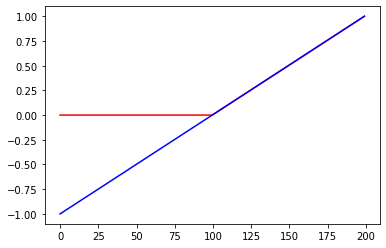

In [233]:
a = Model(0.01,20)
a.Dense(16,'relu')
a.Dense(4,'relu')
a.Dense(1,'None')
err = a.Train(x[10:40],x[10:40])
print(a.Evaluate(x[10:40], x[10:40]))
p = a.Predict(xcopy)
plt.plot(p,'r')
plt.plot(xcopy,'b')
plt.show()

20


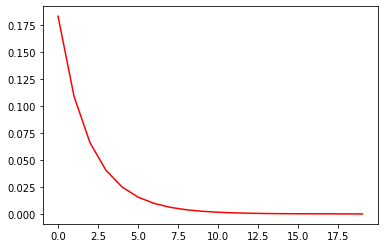

In [212]:
#show classificaion and error
import matplotlib.pyplot as plt
err = np.array(err)
nerr =np.arange(0,err.shape[0])
print(err.shape[0]) 
plt.plot(nerr,err,'r')
plt.show()